In [51]:
# Importing important libaries:-
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from PIL import Image
from wordcloud import ImageColorGenerator,STOPWORDS,WordCloud
import re,os
import string
from nltk.tokenize import word_tokenize,sent_tokenize,regexp_tokenize
from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# Problem statement:-
The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate or false information acquires a tremendous potential to cause real world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed. In this paper, we discuss the problem by presenting the proposals into categories: content based, source based and diffusion based. We describe two opposite approaches and propose an algorithmic solution that synthesizes the main concerns. We conclude the paper by raising awareness about concerns and opportunities for businesses that are currently on the quest to help automatically detecting fake news by providing web services, but who will most certainly, on the long term, profit from their massive 

## Importing Data

In [52]:
# All fake data in dataset:-
df1=pd.read_csv('Fake.csv')
df1.head()
df1.shape

(23481, 4)

In [53]:
# All True data in dataset:-
df2=pd.read_csv('True.csv')

In [54]:
df1['label']=0
df2['label']=1

## Now we here what we do we just concat both the data frames:-

In [56]:
# What we did here we just bring both real and fake dataset into the one dataset.
df=pd.concat([df1,df2],axis=0)

In [57]:
# Shape of dataset.
df.shape

(44898, 5)

In [58]:
# Checking null values.
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [59]:
# Total Duplicated value.
f=df[df.duplicated()==True]
Index=f.index
len(Index)

209

In [60]:
# Droping the Duplicate.
df=df.drop_duplicates(keep="first")

##### Dropping the duplicates cause model always get different data for trainning and work effictively in real time

In [61]:
# Reset the index:-
df.reset_index(inplace=True)

In [62]:
# Shape after Droping.
df.shape

(44689, 6)

In [63]:
 df.head()

,index,title,text,subject,date,label
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [64]:
# Dropping some irrelevent columns.
df=df.drop(columns=['index','date'],axis=1)

In [65]:
# Here we have only three feature columns and one label columns.
df.head(6)

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,0


In [66]:
# Here i am deleting subject columns,beacuse we have to analyzed more than just a subject.
df=df.drop(columns=['subject'],axis=1)

In [67]:
# Here we find the head of the data.
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


#  Exploatory Data Analysis and Cleaning the data:-

# This figure shows before cleaning the data.

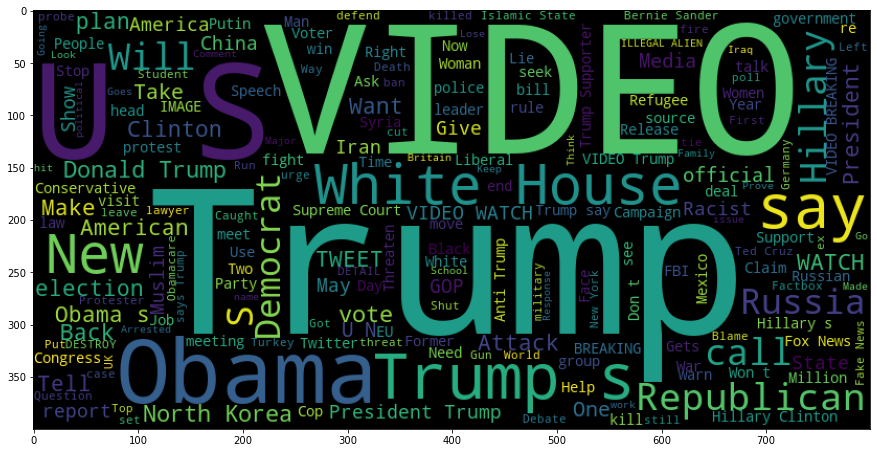

In [68]:
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(df['title'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

### This figures shows the text of only that data which label is == 0 which is Fake news and  true data in which label==1

In [69]:
fake=df[df['label']==0] 

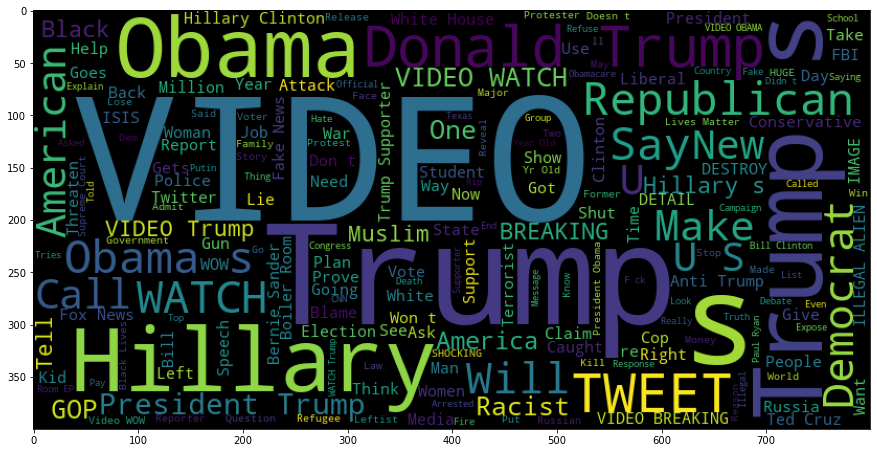

In [70]:
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(fake['title'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

In [71]:
true=df[df['label']==1]

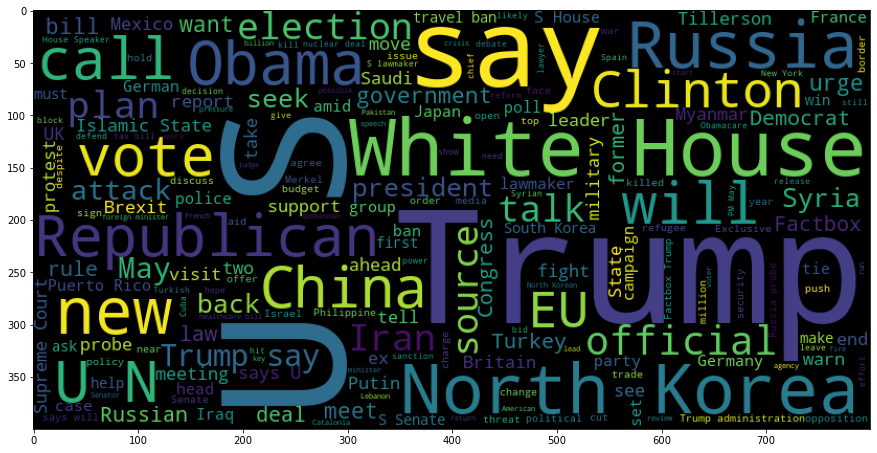

In [72]:
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(true['title'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

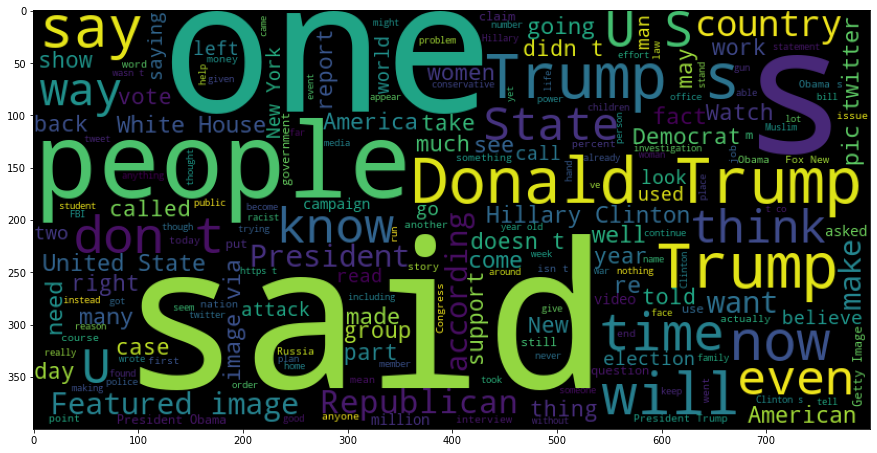

In [73]:
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(fake['text'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

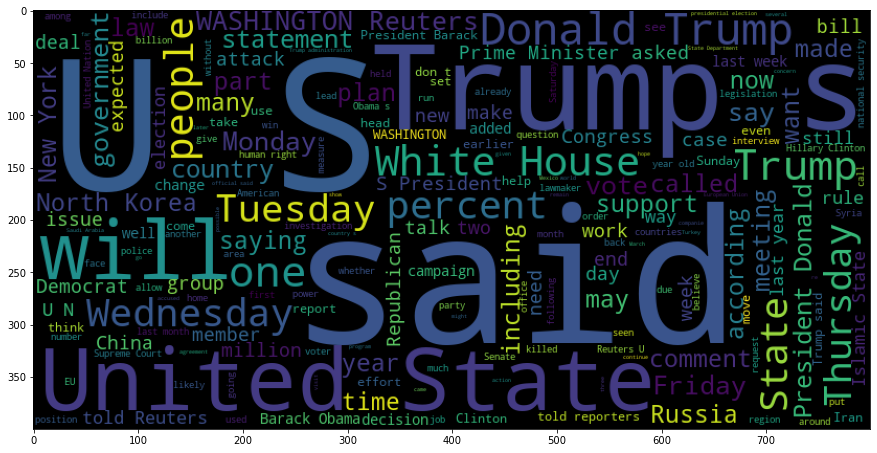

In [74]:
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(true['text'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

In [75]:
# Total labels:-
(df['label'].value_counts()/44689)*100
# There are no imbalance data is here.

0    52.536418
1    47.463582
Name: label, dtype: float64

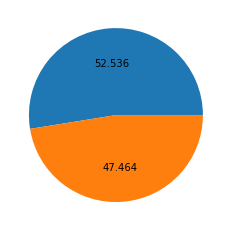

In [76]:
plt.pie(df['label'].value_counts(),autopct="%0.3f")
plt.show()

## Now cleaning the data:-

In [77]:
df['text_length']=df['text'].map(lambda text :len(text))

In [78]:
df.head()

,title,text,label,text_length
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,2893
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,1898
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,3597
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,2774
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,2346


As we see here that length of title and article text length has huge difference, so it is actually ok if we drop the title columns 


# Feature engineering
   ## I am using here neattext for removal irrelevent text.

In [79]:
# Here i am using neat text:-
import neattext as nfx 

In [80]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

#### Removing the stopword, here stopwords are repeated in nature like (of, is,am,are etc..) so, while vectorizing it has risk to give high value than the most relevent words for which model is going to predict.

In [81]:
df['new _text']=df['text'].apply(nfx.remove_stopwords)

In [82]:
df.head()

,title,text,label,text_length,new _text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,2893,Donald Trump wish Americans Happy New Year lea...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,1898,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,3597,"Friday, revealed Milwaukee Sheriff David Clark..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,2774,"Christmas day, Donald Trump announced work fol..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,2346,Pope Francis annual Christmas Day message rebu...


# ** Here we are using some of the replacement in text and also applying the all neat text to remove some of unwanted numbers, currency symbols and removing emojis**


In [83]:
df['new _text']=df['new _text'].replace('http\S+','website')
df['new _text']=df['new _text'].replace('^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
df['new _text']=df['new _text'].replace('<.*?>','')
df['new _text']=df['new _text'].apply(nfx.remove_numbers)
df['new _text']=df['new _text'].apply(nfx.remove_currency_symbols)
df['new _text']=df['new _text'].apply(nfx.remove_emojis)


In [84]:
df['new _text']=df['new _text'].replace("(.*?,", "")

In [85]:
df['new _text'].iloc[-1]

'JAKARTA (Reuters) - Indonesia buy  Sukhoi fighter jets worth . billion Russia exchange cash Indonesian commodities, cabinet ministers said Tuesday. Southeast Asian country pledged ship  million worth commodities addition cash pay Suhkoi SU- fighter jets, expected delivered stages starting years. Indonesian Trade Minister Enggartiasto Lukita said joint statement Defence Minister Ryamizard Ryacudu details type volume commodities negotiated . Previously said exports include palm oil, tea, coffee. deal expected finalised soon Indonesian state trading company PT Perusahaan Perdangangan Indonesia Russian state conglomerate Rostec. Russia currently facing new round U.S.-imposed trade sanctions. Meanwhile, Southeast Asia largest economy trying promote palm oil products amid threats cut consumption European Union countries. Indonesia trying modernize ageing air force string military aviation accidents. Indonesia,  million trade surplus Russia , wants expand bilateral cooperation tourism, educa

In [86]:
import re
df['new _text']=df['new _text'].apply(lambda X:(re.sub(r"[,.'/\:?*#]",'',X)))
df['new _text']=df['new _text'].apply(lambda X:(re.sub(r"r'http\S+', 'webaddress'"," ",X)))
df['new _text']=df['new _text'].apply(lambda X:(re.sub(r"[-,)(]"," ",X)))
df['new _text']=df['new _text'].apply(lambda X:X.lower())


In [87]:
df['new _text']=df['new _text'].apply(lambda X:(re.sub(r"@#"," ",X)))
df['new _text']=df['new _text'].replace("@"," ")
df['new _text']=df['new _text'].apply(lambda X:lemmit.lemmatize(X))


In [88]:
df['new _text']

0        donald trump wish americans happy new year lea...
1        house intelligence committee chairman devin nu...
2        friday revealed milwaukee sheriff david clarke...
3        christmas day donald trump announced work foll...
4        pope francis annual christmas day message rebu...
                               ...                        
44684    brussels  reuters    nato allies tuesday welco...
44685    london  reuters    lexisnexis provider legal r...
44686    minsk  reuters    shadow disused soviet era fa...
44687    moscow  reuters    vatican secretary state car...
44688    jakarta  reuters    indonesia buy  sukhoi figh...
Name: new _text, Length: 44689, dtype: object

# Vectorizer:-

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features = 14000, stop_words='english')


In [90]:
X=tfidf.fit_transform(df['new _text'])

In [91]:
Y=df['label']

# Splitting train and text dataset:-

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=101,test_size=0.35)

In [94]:
# Shape of train and text dataset:-
print(x_train.shape,'\t\t',x_test.shape)
print(y_train.shape,'\t\t',y_test.shape)

(29047, 14000) 		 (15642, 14000)
(29047,) 		 (15642,)


# Model building :-

In [95]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [96]:
#Importing required libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [97]:
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()
rf = RandomForestClassifier()

In [98]:
def print_score(y_pred,clf):
    print('classifier:',clf)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n')   

In [99]:
for classifier in [svc,lr,mnb,sgd,lgb,rf]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred, classifier)

classifier: LinearSVC()
Jaccard score: 0.9880528723945095
Accuracy score: 0.9939905382943358
f1_score: 0.9939905382943358
Precision :  0.9939905382943358
Recall: 0.9939905382943358
Hamming loss:  0.006009461705664237
Confusion matrix:
  [[[7305   44]
  [  50 8243]]

 [[8243   50]
  [  44 7305]]]

classifier: LogisticRegression()
Jaccard score: 0.9738784781374219
Accuracy score: 0.9867663981588032
f1_score: 0.9867663981588032
Precision :  0.9867663981588032
Recall: 0.9867663981588032
Hamming loss:  0.013233601841196778
Confusion matrix:
  [[[7255   94]
  [ 113 8180]]

 [[8180  113]
  [  94 7255]]]

classifier: MultinomialNB()
Jaccard score: 0.8717243029795381
Accuracy score: 0.9314665643779568
f1_score: 0.9314665643779568
Precision :  0.9314665643779568
Recall: 0.9314665643779568
Hamming loss:  0.06853343562204321
Confusion matrix:
  [[[6775  574]
  [ 498 7795]]

 [[7795  498]
  [ 574 6775]]]

classifier: SGDClassifier()
Jaccard score: 0.9805013927576601
Accuracy score: 0.99015471167369

In [105]:
data={'model':['linearSVC','logistic','multinomial','sdg','LGBM','Random Forest'],
  'acc_score':[0.9939905382943358,0.9939905382943358, 0.9314665643779568,0.9901547116736991,0.9901547116736991,0.996100242935686],
     'Jaccard score': [0.9880528723945095,0.9738784781374219,0.8717243029795381,0.9805013927576601,0.9941356450790413,0.9922307839266382],
     'f1_score':[0.9939905382943358,0.9867663981588032,0.9314665643779568,0.9901547116736991,0.9970591995908452,0.996100242935686],
     }

In [106]:
score=pd.DataFrame(data)
score

,model,acc_score,Jaccard score,f1_score
0,linearSVC,0.993991,0.988053,0.993991
1,logistic,0.993991,0.973878,0.986766
2,multinomial,0.931467,0.871724,0.931467
3,sdg,0.990155,0.980501,0.990155
4,LGBM,0.990155,0.994136,0.997059
5,Random Forest,0.996100,0.992231,0.996100


##### Here in above score card we see that the jaccard score is high in linearSVC but accuracy is high in Random forest although F1_score is higher in LGBM.But here we are focus in accuracy, so for now i am selection Random forest model. lets see after cross validation if its overfitted or  underfitted , it it shows sufficient result then i select it.



# Cross Validation:-

In [116]:
# For cross validation see if model is overfitted or not:-
from sklearn.model_selection import cross_val_score

models=[svc,lr,mnb,sgd,lgb,rf]
for i in models:
    print("cross_val_score of",i,":-",cross_val_score(i,X,Y,cv=5).mean())


cross_val_score of LinearSVC() :- 0.9887668316338735
cross_val_score of LogisticRegression() :- 0.9748485238393224
cross_val_score of MultinomialNB() :- 0.8955902500717773
cross_val_score of SGDClassifier() :- 0.9828146144114693
cross_val_score of LGBMClassifier() :- 0.9960168958748634
cross_val_score of RandomForestClassifier() :- 0.994293877785457


#####  Here i see that LGBM classifier showing good result or even better than Random Forest

##### There in no need for Hyperparametertuning, as result already showing 99 % , Which is good for the model and work effectively.

## Saving the model

In [117]:
# Importing package and mentioning file name.
import joblib
filename='Fake News Project Model'

In [119]:
# Saving the model.
joblib.dump(lgb,filename)

['Fake News Project Model']

In [120]:
# Load the model to check 
joblib.load('Fake News Project Model')

LGBMClassifier()

### Conclusion:-

#### All the best model are used and trained.Data has lots of irrelevent text, cleaning is most important part.It plays vitle role while training the model,more accurate the text better the model performance.some of model shows best accuracy some of them shows less accuracy we also use confusion matrix for evaluation. And at last cross validation is also used as model is underfitted or overfitted it shows in there.It pass cross validation and there is no need of hyperparameter, as model is already showing its maximum capacity in accuracy score.